## Problem statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands.

## Data understanding and exploration:

Importing the necessary libraries and packages

In [ ]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

In [ ]:
#reading the dataset
bike = pd.read_csv('day.csv')

In [ ]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Preparation 

In [ ]:
#changing the numerical values of columns into categorical vales:

bike['season'] = bike['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
bike['mnth'] = bike['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct',
                                 11:'Nov', 12: 'Dec'})
bike['weekday'] = bike['weekday'].map({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thurday',
                                       5:'Friday', 6:'Saturday'})
bike['weathersit']= bike['weathersit'].map({1:'Clear+PartlyCloudy', 2:'Mist+FewCloudy', 3:'LightSnow+LightRain', 
                                              4:'HeavyRain+IcePallets+Fog'})

In [ ]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Monday,1,Mist+FewCloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tuesday,1,Mist+FewCloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wednesday,1,Clear+PartlyCloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thurday,1,Clear+PartlyCloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Friday,1,Clear+PartlyCloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
#changing the dteday to datetime64 datatype:

bike.dteday = bike.dteday.astype('datetime64')

## Data Visualization

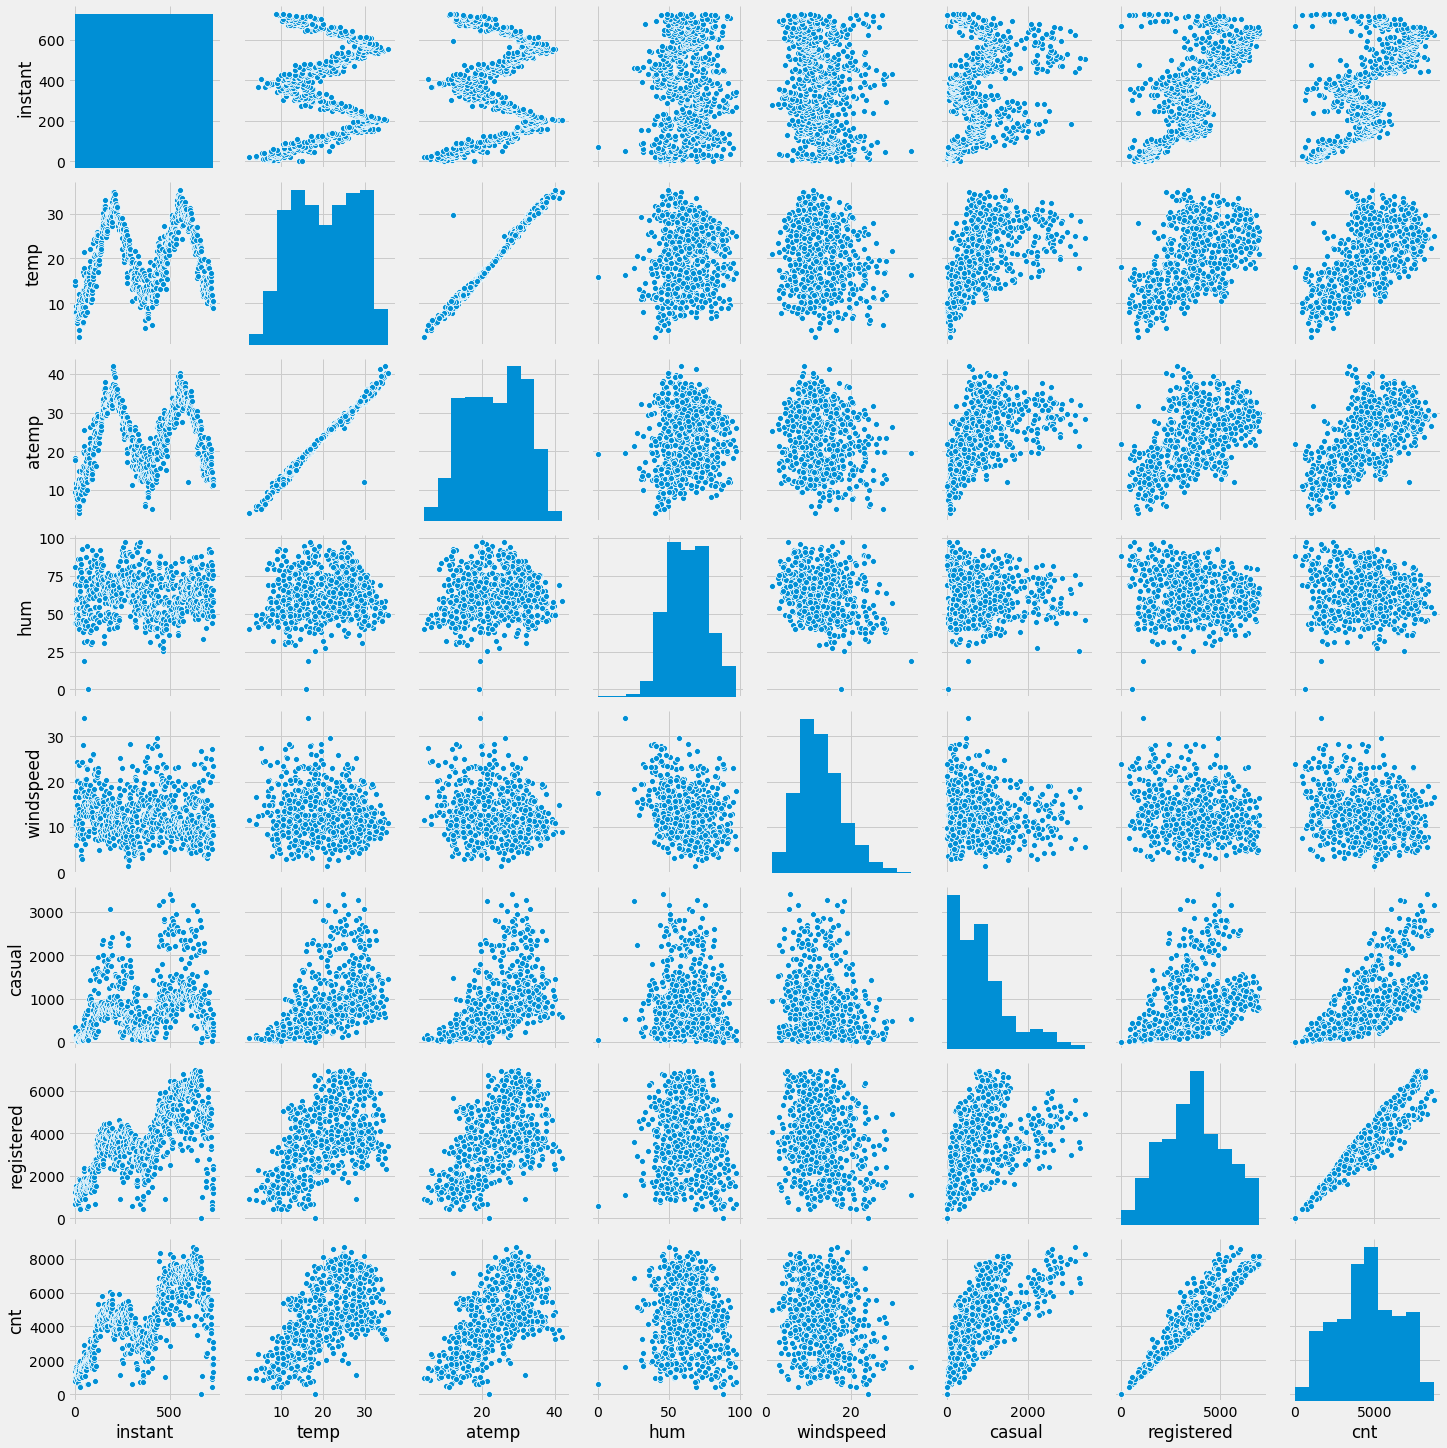

In [ ]:
#craeting a pairplot to understand the data and dependencies

plt.style.use('fivethirtyeight')
sns.pairplot(bike.loc[:,~bike.columns.isin(['yr','holiday','workingday'])])
plt.show()

Inferences:
- there is a linear relationship between the target variable 'cnt' and registered.
- there is a linear relationship between the target variable 'cnt' and casual.
- there is a linear relationship between the target variable 'cnt' and atemp.
- there is a linear relationship between the target variable 'cnt' and temp.

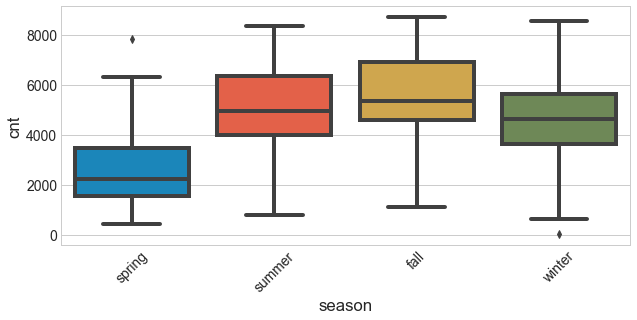

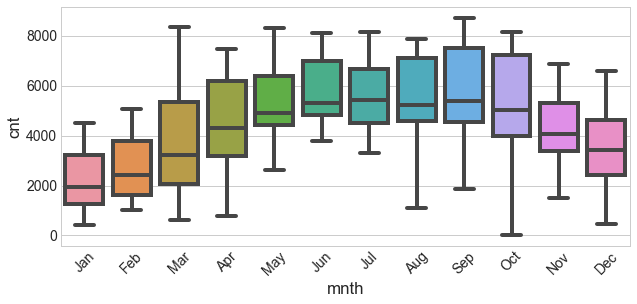

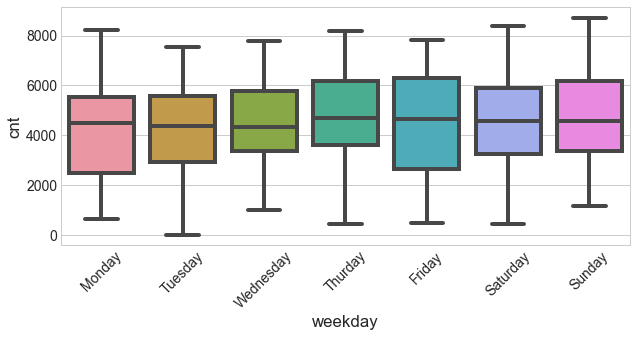

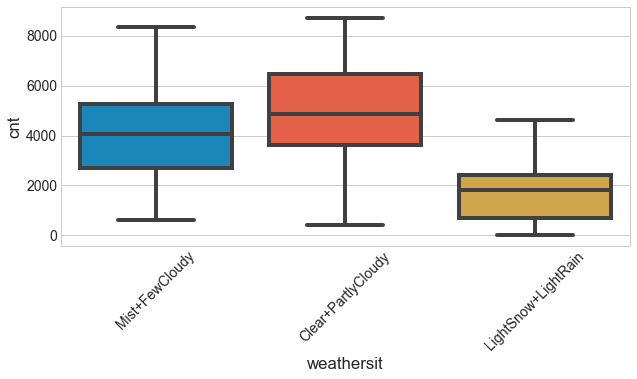

In [ ]:
#building boxplots for different categorical variables

plt.style.use('seaborn-whitegrid')
cols = ['season','mnth','weekday','weathersit']
for i,val in enumerate(cols):
    plt.figure(figsize=[20,9])
    plt.subplot(2,2,i+1)
    sns.boxplot(data = bike, x=val, y='cnt')
    plt.xticks(rotation=45)
    plt.xlabel(val)
    plt.ylabel('cnt')
    plt.show()
    

Inferences:
- For weathersit, we see that LightSnow+LightRain has lowest range and Clear+PartlyCloudy has the highest values.
- For weekday, we see that the median of all weekdays is almost equal
- For season, spring has the lowest range of values. Also, there is an outlier in spring.
- For mnth, the Inter-quartile range is maximum for Sep followed by Mar and Oct

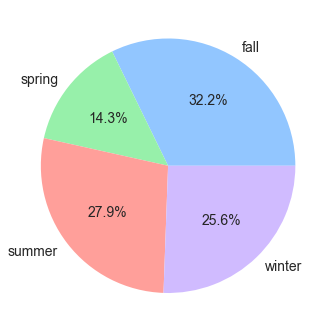

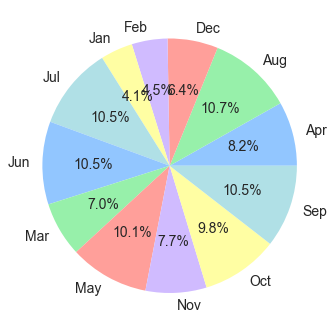

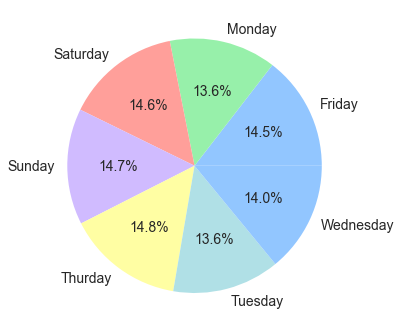

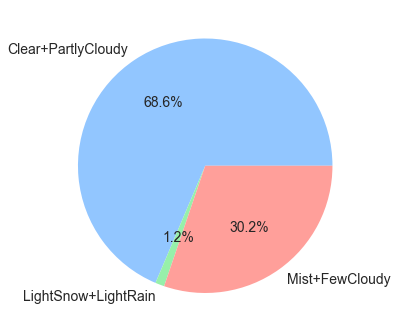

In [ ]:
#plotting piecharts to understand the count of cnt falling in different categories:

plt.style.use('seaborn-pastel')
cols = ['season','mnth','weekday','weathersit']
for i,val in enumerate(cols):
    plt.figure(figsize=[12,12])
    plt.subplot(2,2,i+1)
    bike.groupby(by=val)['cnt'].sum().plot.pie(autopct='%1.1f%%')
    plt.axis('off')
    plt.show()

Inferences:
- In season Pie-chart, fall has the highest strenth which is equal to 32.2%
- In mnth Pie-chart, Aug has the highest strenth which is equal to 10.7%
- In weekday Pie-chart, Thursday has the highest strenth which is equal to 14.8%
- In weathersit Pie-chart, Clear+PartlyCloudy has the highest strenth which is equal to 68.6%


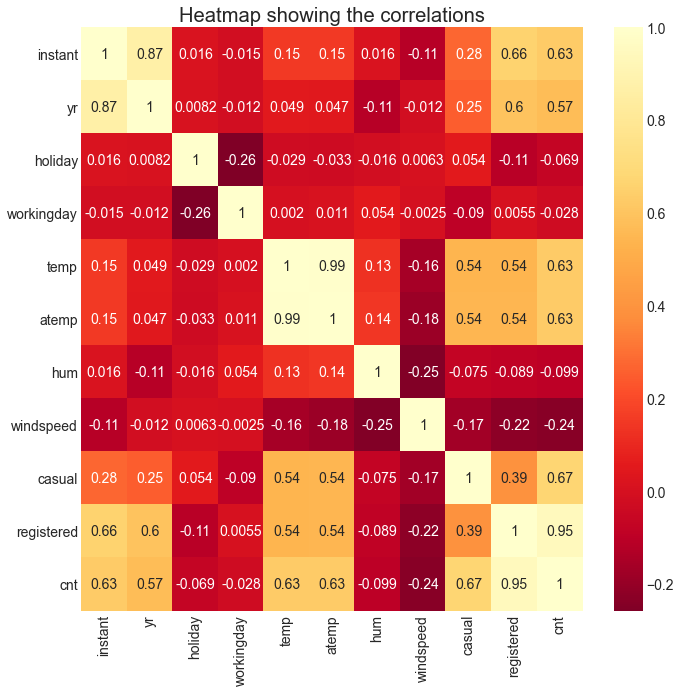

In [ ]:
plt.figure(figsize=[10,10])
sns.heatmap(bike.corr(), annot=True, cmap='YlOrRd_r')
plt.title('Heatmap showing the correlations')
plt.show()

Inferences:
- temp and atemp are highly correlated with each other with value = 0.99, so its okay to drop any one of them.
- we see that holiday, workingday, hum, windspeed have negetive correlation on our target variable cnt

In [ ]:
#dropping atemp as it is highly correlated with temp
bike = bike.drop('atemp', axis=1)

In [ ]:
#All Categorical Variable in the dataset 
cat_col = bike.select_dtypes(exclude=['float64','datetime64','int64'])
cat_col.head()

,season,mnth,weekday,weathersit
0,spring,Jan,Monday,Mist+FewCloudy
1,spring,Jan,Tuesday,Mist+FewCloudy
2,spring,Jan,Wednesday,Clear+PartlyCloudy
3,spring,Jan,Thurday,Clear+PartlyCloudy
4,spring,Jan,Friday,Clear+PartlyCloudy


In [ ]:
#creating dummy variables for all categorical data:
dummy = pd.get_dummies(cat_col,drop_first=True)
dummy.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thurday,weekday_Tuesday,weekday_Wednesday,weathersit_LightSnow+LightRain,weathersit_Mist+FewCloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#dropping the categorical variables from original:

bike = bike.drop(bike.select_dtypes(exclude=['int64','float64','datetime64']).columns, axis=1)
bike.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,0,0,1,14.110847,80.5833,10.749882,331,654,985
1,2,2018-02-01,0,0,1,14.902598,69.6087,16.652113,131,670,801
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82,1518,1600


In [ ]:
# concat this dummy dataframe to original dataframe:
bike = pd.concat([bike,dummy], axis=1)
bike.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thurday,weekday_Tuesday,weekday_Wednesday,weathersit_LightSnow+LightRain,weathersit_Mist+FewCloudy
0,1,2018-01-01,0,0,1,14.110847,80.5833,10.749882,331,654,...,0,0,1,0,0,0,0,0,0,1
1,2,2018-02-01,0,0,1,14.902598,69.6087,16.652113,131,670,...,0,0,0,0,0,0,1,0,0,1
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120,1229,...,0,0,0,0,0,0,0,1,0,0
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108,1454,...,0,0,0,0,0,1,0,0,0,0
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82,1518,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#dropping unnecessary columns which are not needed in analysis:

bike = bike.drop(['instant','dteday','registered','casual'], axis=True)

## Dividing the Dataset into Train and Test:

In [ ]:
#using Train_test_split package of sklearn.model_selection

bike_train, bike_test = train_test_split(bike, train_size=0.7, random_state=100)
print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(220, 29)


In [ ]:
#Normalizing the train dataset:

num_cols = ['temp','hum','windspeed','cnt']
scaler = MinMaxScaler()
bike_train[num_cols] = scaler.fit_transform(bike_train[num_cols])
bike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thurday,weekday_Tuesday,weekday_Wednesday,weathersit_LightSnow+LightRain,weathersit_Mist+FewCloudy
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
bike_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thurday,weekday_Tuesday,weekday_Wednesday,weathersit_LightSnow+LightRain,weathersit_Mist+FewCloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


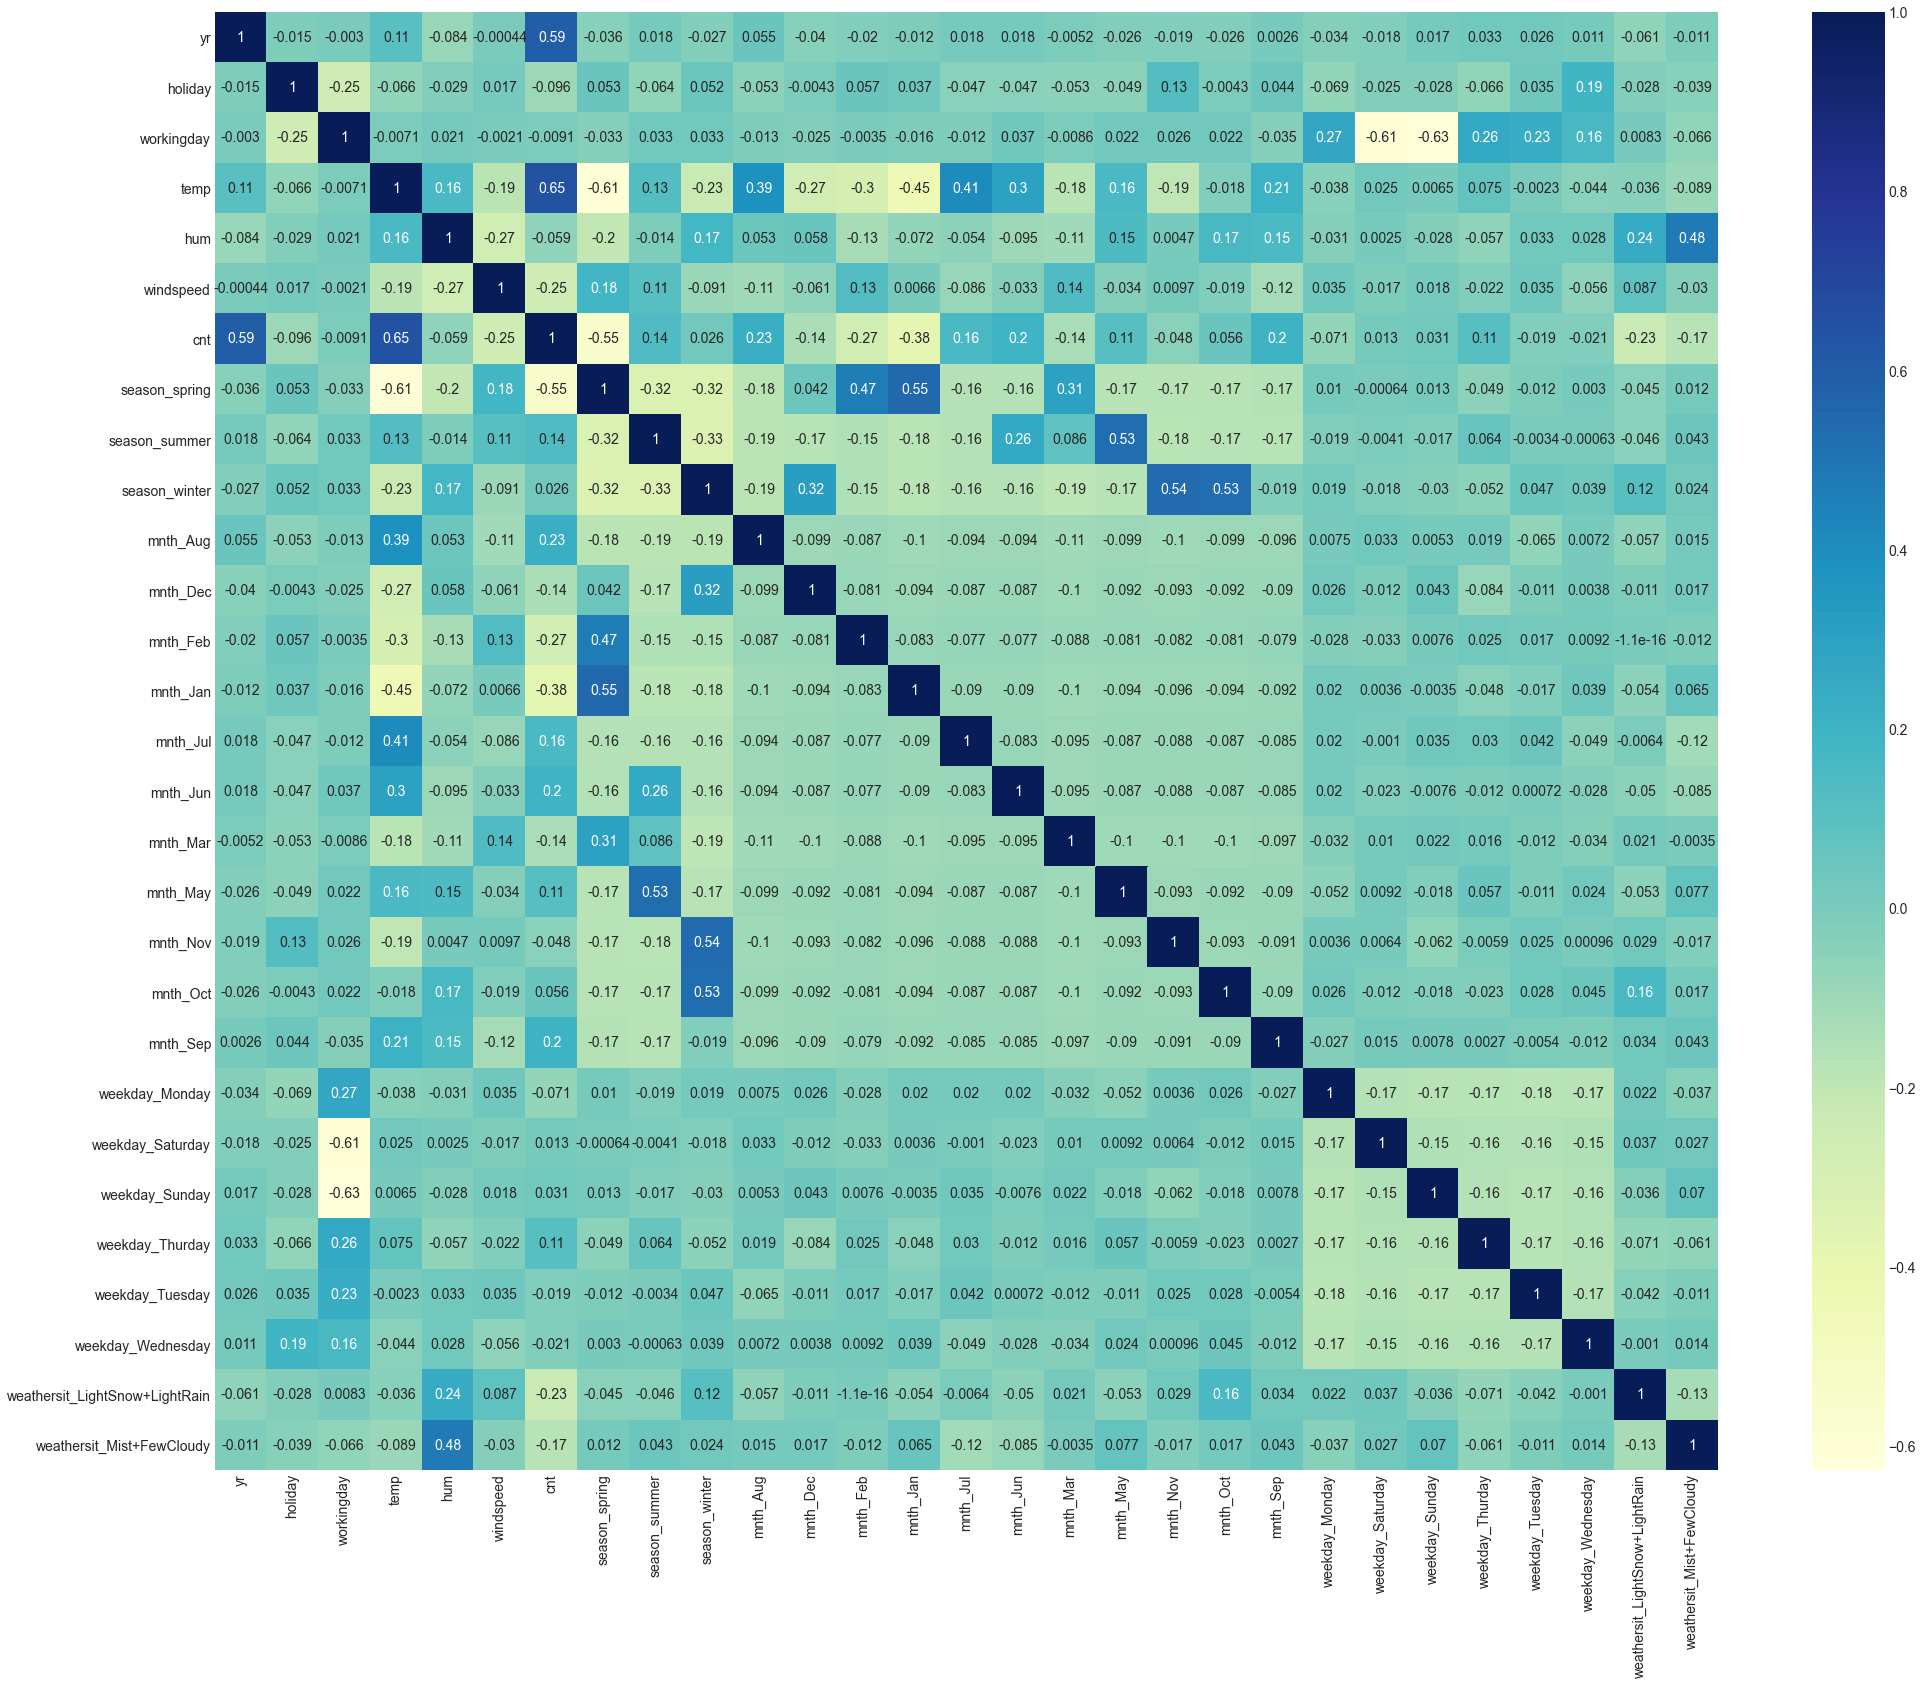

In [ ]:
#plotting a heatmap to check the correlations:

plt.figure(figsize=(30,25))
sns.heatmap(bike_train.corr(), annot=True, cmap = 'YlGnBu')
plt.show()

Inferences:
- it is evident that 'yr' and 'temp' have high correlations with our target variable 'cnt'

## Spliting the train into X and Y

In [ ]:
y_train = bike_train.pop('cnt')
X_train = bike_train

## Building the Model:

### Using RFE:

In [ ]:
from sklearn.feature_selection import RFE

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,15)
rfe = rfe.fit(X_train,y_train)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 11),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 8),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 7),
 ('weekday_Saturday', False, 4),
 ('weekday_Sunday', False, 5),
 ('weekday_Thurday', False, 13),
 ('weekday_Tuesday', False, 6),
 ('weekday_Wednesday', False, 10),
 ('weathersit_LightSnow+LightRain', True, 1),
 ('weathersit_Mist+FewCloudy', True, 1)]

In [ ]:
#All RFE supported columns 
print(X_train.columns[rfe.support_])
print(len(X_train.columns[rfe.support_]))

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weathersit_LightSnow+LightRain',
       'weathersit_Mist+FewCloudy'],
      dtype='object')
15


In [ ]:
#All RFE non-supported columns 
print(X_train.columns[~rfe.support_])
print(len(X_train.columns[~rfe.support_]))

Index(['workingday', 'mnth_Aug', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Oct', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thurday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')
13


## Using Statsmodels for further model building

In [ ]:
#choosing only those columns which RFE supported:
X_train_rfe = X_train[X_train.columns[rfe.support_]]

#adding constant
X_train_rfe = sm.add_constant(X_train_rfe)

#Building the linear regression model
lm_model = sm.OLS(y_train,X_train_rfe).fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          8.15e-189
Time:                        01:00:34   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.3197      0.036      8.859      0.000       0.249       0.391
yr                                 0.2304      0.008     28.487      0.000       0.215       0.246
holiday                           -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp                               0.4815      0.037     13.005      0.000       0.409       0.554
hum                               -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed                         -0.1887      0.026     -7.315      0.000      -0.239      -0.138
season_spring                     -0.0613      0.021     -2.881      0.004      -0.103      -0.019
season_summer                      0.0423      0.015      2.761      0.006       0.012       0.072
season_winter                      0.1019      0.018      5.656      0.000       0.067       0.137
mnth_Dec                          -0.0355      0.018     -2.024      0.043      -0.070      -0.001
mnth_Jan                          -0.0434      0.018     -2.393      0.017      -0.079      -0.008
mnth_Jul                          -0.0553      0.018     -3.030      0.003      -0.091      -0.019
mnth_Nov                          -0.0387      0.019     -2.057      0.040      -0.076      -0.002
mnth_Sep                           0.0755      0.017      4.466      0.000       0.042       0.109
weathersit_LightSnow+LightRain    -0.2465      0.026     -9.331      0.000      -0.298      -0.195
weathersit_Mist+FewCloudy         -0.0543      0.010     -5.194      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#dropping the constant:
X_train_rfe = X_train_rfe.drop('const',axis=1)

#finding the VIF

vif = pd.DataFrame()
vif['feature'] = X_train_rfe.columns
vif['vif']= [round(variance_inflation_factor(X_train_rfe.values,i),2) for i in range(X_train_rfe.shape[1])]
vif

,feature,vif
0,yr,2.09
1,holiday,1.06
2,temp,17.79
3,hum,30.89
4,windspeed,4.72
5,season_spring,4.37
6,season_summer,2.82
7,season_winter,4.06
8,mnth_Dec,1.56
9,mnth_Jan,1.75


We'll drop the mnth_Nov feature as it has significantly high P-value = 0.040

In [ ]:
#dropping holiday and rebuilding
X_train_rfe1 = X_train_rfe.drop('mnth_Nov',axis=1)

#adding constant
X_train_rfe1 = sm.add_constant(X_train_rfe1)

#Building the linear regression model
lm_model1 = sm.OLS(y_train,X_train_rfe1).fit()
lm_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.7
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          4.71e-189
Time:                        01:00:34   Log-Likelihood:                 512.01
No. Observations:                 510   AIC:                            -994.0
Df Residuals:                     495   BIC:                            -930.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.3036      0.035      8.590      0.000       0.234       0.373
yr                                 0.2302      0.008     28.372      0.000       0.214       0.246
holiday                           -0.0974      0.026     -3.817      0.000      -0.147      -0.047
temp                               0.5007      0.036     13.930      0.000       0.430       0.571
hum                               -0.1630      0.038     -4.298      0.000      -0.237      -0.088
windspeed                         -0.1897      0.026     -7.332      0.000      -0.241      -0.139
season_spring                     -0.0533      0.021     -2.542      0.011      -0.095      -0.012
season_summer                      0.0477      0.015      3.150      0.002       0.018       0.078
season_winter                      0.0927      0.018      5.295      0.000       0.058       0.127
mnth_Dec                          -0.0212      0.016     -1.313      0.190      -0.053       0.011
mnth_Jan                          -0.0386      0.018     -2.139      0.033      -0.074      -0.003
mnth_Jul                          -0.0551      0.018     -3.012      0.003      -0.091      -0.019
mnth_Sep                           0.0809      0.017      4.828      0.000       0.048       0.114
weathersit_LightSnow+LightRain    -0.2424      0.026     -9.173      0.000      -0.294      -0.190
weathersit_Mist+FewCloudy         -0.0534      0.010     -5.099      0.000      -0.074      -0.033
==============================================================================
Omnibus:                       61.182   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.241
Skew:                          -0.645   Prob(JB):                     3.52e-31
Kurtosis:                       5.221   Cond. No.                         20.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
##dropping the constant:
X_train_rfe1 = X_train_rfe1.drop('const',axis=1)

#finding the VIF

vif = pd.DataFrame()
vif['feature'] = X_train_rfe1.columns
vif['vif']= [round(variance_inflation_factor(X_train_rfe1.values,i),2) for i in range(X_train_rfe1.shape[1])]
vif

,feature,vif
0,yr,2.09
1,holiday,1.04
2,temp,17.38
3,hum,30.34
4,windspeed,4.66
5,season_spring,4.35
6,season_summer,2.80
7,season_winter,3.43
8,mnth_Dec,1.35
9,mnth_Jan,1.73


We'll drop the mnth_Dec feature as it has significantly high P-value = 0.190

In [ ]:
#dropping mnth_Dec and rebuilding
X_train_rfe2 = X_train_rfe1.drop('mnth_Dec',axis=1)

#adding constant
X_train_rfe2 = sm.add_constant(X_train_rfe2)

#Building the linear regression model
lm_model2 = sm.OLS(y_train,X_train_rfe2).fit()
lm_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          7.59e-190
Time:                        01:00:35   Log-Likelihood:                 511.13
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     496   BIC:                            -935.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.2964      0.035      8.483      0.000       0.228       0.365
yr                                 0.2301      0.008     28.339      0.000       0.214       0.246
holiday                           -0.0963      0.026     -3.773      0.000      -0.146      -0.046
temp                               0.5124      0.035     14.706      0.000       0.444       0.581
hum                               -0.1681      0.038     -4.452      0.000      -0.242      -0.094
windspeed                         -0.1874      0.026     -7.253      0.000      -0.238      -0.137
season_spring                     -0.0519      0.021     -2.476      0.014      -0.093      -0.011
season_summer                      0.0502      0.015      3.336      0.001       0.021       0.080
season_winter                      0.0919      0.018      5.247      0.000       0.057       0.126
mnth_Jan                          -0.0333      0.018     -1.892      0.059      -0.068       0.001
mnth_Jul                          -0.0556      0.018     -3.039      0.003      -0.092      -0.020
mnth_Sep                           0.0827      0.017      4.951      0.000       0.050       0.116
weathersit_LightSnow+LightRain    -0.2392      0.026     -9.084      0.000      -0.291      -0.187
weathersit_Mist+FewCloudy         -0.0526      0.010     -5.025      0.000      -0.073      -0.032
==============================================================================
Omnibus:                       58.633   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.919
Skew:                          -0.626   Prob(JB):                     2.26e-29
Kurtosis:                       5.154   Cond. No.                         19.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#dropping the constant:
X_train_rfe2 = X_train_rfe2.drop('const',axis=1)

#finding the VIF

vif = pd.DataFrame()
vif['feature'] = X_train_rfe2.columns
vif['vif']= [round(variance_inflation_factor(X_train_rfe2.values,i),2) for i in range(X_train_rfe2.shape[1])]
vif

,feature,vif
0,yr,2.09
1,holiday,1.04
2,temp,16.71
3,hum,29.02
4,windspeed,4.66
5,season_spring,4.34
6,season_summer,2.79
7,season_winter,3.36
8,mnth_Jan,1.67
9,mnth_Jul,1.59


We'll drop feature = mnth_Jan as it has P-value = 0.059 which is significantly high

In [ ]:
#dropping mnth_Jan and rebuilding
X_train_rfe3 = X_train_rfe2.drop('mnth_Jan',axis=1)

#adding constant
X_train_rfe3 = sm.add_constant(X_train_rfe3)

#Building the linear regression model
lm_model3 = sm.OLS(y_train,X_train_rfe3).fit()
lm_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          2.95e-190
Time:                        01:00:35   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.2848      0.034      8.258      0.000       0.217       0.353
yr                                 0.2294      0.008     28.208      0.000       0.213       0.245
holiday                           -0.0969      0.026     -3.787      0.000      -0.147      -0.047
temp                               0.5299      0.034     15.728      0.000       0.464       0.596
hum                               -0.1726      0.038     -4.569      0.000      -0.247      -0.098
windspeed                         -0.1822      0.026     -7.074      0.000      -0.233      -0.132
season_spring                     -0.0564      0.021     -2.700      0.007      -0.097      -0.015
season_summer                      0.0531      0.015      3.536      0.000       0.024       0.083
season_winter                      0.0976      0.017      5.643      0.000       0.064       0.132
mnth_Jul                          -0.0572      0.018     -3.123      0.002      -0.093      -0.021
mnth_Sep                           0.0833      0.017      4.973      0.000       0.050       0.116
weathersit_LightSnow+LightRain    -0.2369      0.026     -8.983      0.000      -0.289      -0.185
weathersit_Mist+FewCloudy         -0.0527      0.010     -5.017      0.000      -0.073      -0.032
==============================================================================
Omnibus:                       57.486   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.221
Skew:                          -0.612   Prob(JB):                     5.28e-29
Kurtosis:                       5.151   Cond. No.                         19.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#dropping the constant:
X_train_rfe3 = X_train_rfe3.drop('const',axis=1)

#finding the VIF

vif = pd.DataFrame()
vif['feature'] = X_train_rfe3.columns
vif['vif']= [round(variance_inflation_factor(X_train_rfe3.values,i),2) for i in range(X_train_rfe3.shape[1])]
vif

,feature,vif
0,yr,2.08
1,holiday,1.04
2,temp,16.03
3,hum,28.03
4,windspeed,4.65
5,season_spring,4.01
6,season_summer,2.79
7,season_winter,3.33
8,mnth_Jul,1.58
9,mnth_Sep,1.38


We'll drop feature = hum as it has very high VIF value i.e = 28.03

In [ ]:
#dropping mnth_Nov and rebuilding
X_train_rfe4 = X_train_rfe3.drop('hum',axis=1)

#adding constant
X_train_rfe4 = sm.add_constant(X_train_rfe4)

#Building the linear regression model
lm_model4 = sm.OLS(y_train,X_train_rfe4).fit()
lm_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          5.06e-187
Time:                        01:00:35   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.1994      0.030      6.746      0.000       0.141       0.258
yr                                 0.2336      0.008     28.352      0.000       0.217       0.250
holiday                           -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temp                               0.4910      0.033     14.770      0.000       0.426       0.556
windspeed                         -0.1479      0.025     -5.887      0.000      -0.197      -0.099
season_spring                     -0.0672      0.021     -3.175      0.002      -0.109      -0.026
season_summer                      0.0465      0.015      3.051      0.002       0.017       0.076
season_winter                      0.0817      0.017      4.730      0.000       0.048       0.116
mnth_Jul                          -0.0521      0.019     -2.790      0.005      -0.089      -0.015
mnth_Sep                           0.0768      0.017      4.517      0.000       0.043       0.110
weathersit_LightSnow+LightRain    -0.2842      0.025    -11.487      0.000      -0.333      -0.236
weathersit_Mist+FewCloudy         -0.0802      0.009     -9.146      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#dropping the constant:
X_train_rfe4 = X_train_rfe4.drop('const',axis=1)

#finding the VIF

vif = pd.DataFrame()
vif['feature'] = X_train_rfe4.columns
vif['vif']= [round(variance_inflation_factor(X_train_rfe4.values,i),2) for i in range(X_train_rfe4.shape[1])]
vif

,feature,vif
0,yr,2.07
1,holiday,1.04
2,temp,5.09
3,windspeed,4.60
4,season_spring,2.08
5,season_summer,2.23
6,season_winter,1.78
7,mnth_Jul,1.58
8,mnth_Sep,1.34
9,weathersit_LightSnow+LightRain,1.08


We'll drop feature = season_summer as it has P-value = 0.002

In [ ]:
#dropping mnth_Jul and rebuilding
X_train_rfe5 = X_train_rfe4.drop('season_summer',axis=1)

#adding constant
X_train_rfe5 = sm.add_constant(X_train_rfe5)

#Building the linear regression model
lm_model5 = sm.OLS(y_train,X_train_rfe5).fit()
lm_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.5
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          3.10e-186
Time:                        01:00:35   Log-Likelihood:                 494.07
No. Observations:                 510   AIC:                            -966.1
Df Residuals:                     499   BIC:                            -919.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.2531      0.024     10.569      0.000       0.206       0.300
yr                                 0.2342      0.008     28.210      0.000       0.218       0.251
holiday                           -0.0980      0.026     -3.727      0.000      -0.150      -0.046
temp                               0.4498      0.031     14.686      0.000       0.390       0.510
windspeed                         -0.1395      0.025     -5.540      0.000      -0.189      -0.090
season_spring                     -0.1123      0.015     -7.360      0.000      -0.142      -0.082
season_winter                      0.0449      0.012      3.602      0.000       0.020       0.069
mnth_Jul                          -0.0729      0.018     -4.167      0.000      -0.107      -0.039
mnth_Sep                           0.0573      0.016      3.606      0.000       0.026       0.089
weathersit_LightSnow+LightRain    -0.2855      0.025    -11.445      0.000      -0.334      -0.236
weathersit_Mist+FewCloudy         -0.0796      0.009     -9.014      0.000      -0.097      -0.062
==============================================================================
Omnibus:                       57.674   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.692
Skew:                          -0.599   Prob(JB):                     2.08e-30
Kurtosis:                       5.235   Cond. No.                         14.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#dropping the constant:
X_train_rfe5 = X_train_rfe5.drop('const',axis=1)
#finding the VIF

vif = pd.DataFrame()
vif['feature'] = X_train_rfe5.columns
vif['vif']= [round(variance_inflation_factor(X_train_rfe5.values,i),2) for i in range(X_train_rfe5.shape[1])]
vif

Dropping the feature = windspeed as it has a VIF = 4.00

In [ ]:
#dropping windspeed and rebuilding
X_train_rfe6 = X_train_rfe5.drop('windspeed',axis=1)

#adding constant
X_train_rfe6 = sm.add_constant(X_train_rfe6)

#Building the linear regression model
lm_model6 = sm.OLS(y_train,X_train_rfe6).fit()
lm_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.3
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          5.25e-181
Time:                        01:00:35   Log-Likelihood:                 478.85
No. Observations:                 510   AIC:                            -937.7
Df Residuals:                     500   BIC:                            -895.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.1952      0.022      8.802      0.000       0.152       0.239
yr                                 0.2332      0.009     27.291      0.000       0.216       0.250
holiday                           -0.1006      0.027     -3.716      0.000      -0.154      -0.047
temp                               0.4695      0.031     14.995      0.000       0.408       0.531
season_spring                     -0.1122      0.016     -7.143      0.000      -0.143      -0.081
season_winter                      0.0534      0.013      4.197      0.000       0.028       0.078
mnth_Jul                          -0.0690      0.018     -3.833      0.000      -0.104      -0.034
mnth_Sep                           0.0654      0.016      4.015      0.000       0.033       0.097
weathersit_LightSnow+LightRain    -0.2993      0.026    -11.717      0.000      -0.349      -0.249
weathersit_Mist+FewCloudy         -0.0781      0.009     -8.594      0.000      -0.096      -0.060
==============================================================================
Omnibus:                       66.632   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.465
Skew:                          -0.661   Prob(JB):                     5.85e-38
Kurtosis:                       5.515   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#dropping the constant:
X_train_rfe6 = X_train_rfe6.drop('const',axis=1)
#finding the VIF

vif = pd.DataFrame()
vif['feature'] = X_train_rfe6.columns
vif['vif']= [round(variance_inflation_factor(X_train_rfe6.values,i),2) for i in range(X_train_rfe6.shape[1])]
vif

,feature,vif
0,yr,2.05
1,holiday,1.04
2,temp,2.99
3,season_spring,1.25
4,season_winter,1.33
5,mnth_Jul,1.33
6,mnth_Sep,1.19
7,weathersit_LightSnow+LightRain,1.06
8,weathersit_Mist+FewCloudy,1.51


Now as the p-values and the VIFs are in our acceptable range we can go ahead to make our predictions using this model.

## Residual Analysis and Predictions the Train Data

In [ ]:
X_train_rfe6 = sm.add_constant(X_train_rfe6)

#making predictions on train data
y_train_pred = lm_model6.predict(X_train_rfe6)

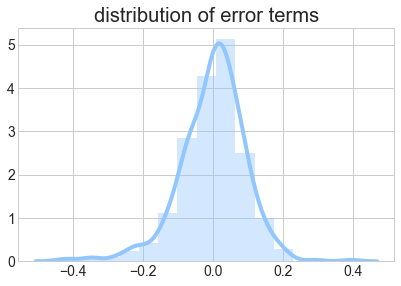

In [ ]:
#plotting for errors:
plt.style.use('seaborn-pastel')
sns.distplot(y_train-y_train_pred, bins=15)
plt.title('distribution of error terms')
plt.show()

inference: 
- The errors follow a normal distribution
- The error terms have a mean of 0
- Error terms are independent of each other

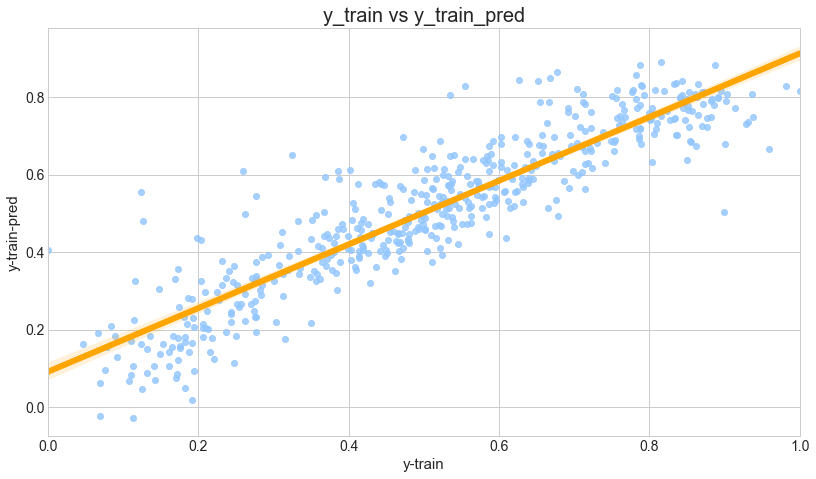

In [ ]:
#plotting y_test vs y_test_pred
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=[12,7])
sns.regplot(y_train,y_train_pred, line_kws={'color':'orange'})
plt.title("y_train vs y_train_pred", fontsize= 20)
plt.xlabel("y-train", fontsize=15)
plt.ylabel("y-train-pred", fontsize=15)
plt.show()

## Making predictions on Test data with the final trained model:

In [ ]:
#Normalizing the train dataset:
num_cols = ['temp','hum','windspeed','cnt']
bike_test[num_cols] = scaler.transform(bike_test[num_cols])
bike_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thurday,weekday_Tuesday,weekday_Wednesday,weathersit_LightSnow+LightRain,weathersit_Mist+FewCloudy
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
#Dividing the test dataset into X and Y:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [ ]:
#taking only those columns which are present in our final train-set
X_train_rfe6 = X_train_rfe6.drop('const',axis=1)
X_test_final = X_test[X_train_rfe6.columns]

In [ ]:
#adding constant:
X_test_final = sm.add_constant(X_test_final)
#making prediction on test dataset
y_test_pred = lm_model6.predict(X_test_final)

## Model Evaluation:

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred)

0.8096078487662723

In [ ]:
#Finding the adjusted R-squared value for our test data:
1-(1-r2_score(y_test,y_test_pred))*(len(y_test)-1)/(len(y_test)-len(X_test_final.columns)-1)

0.8004981764584385

### Residual Analysis on Test Dataset

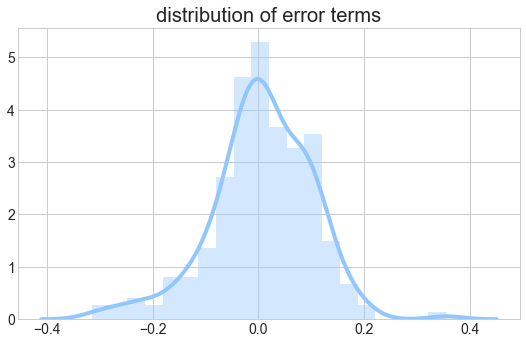

In [ ]:
#residual analysis:
plt.style.use('seaborn-pastel')
plt.figure(figsize=[8,5])
sns.distplot(y_test-y_test_pred, bins=20)
plt.title('distribution of error terms')
plt.show()

inference: 
- The errors follow a normal distribution
- The error terms have a mean of 0
- Error terms are independent of each other

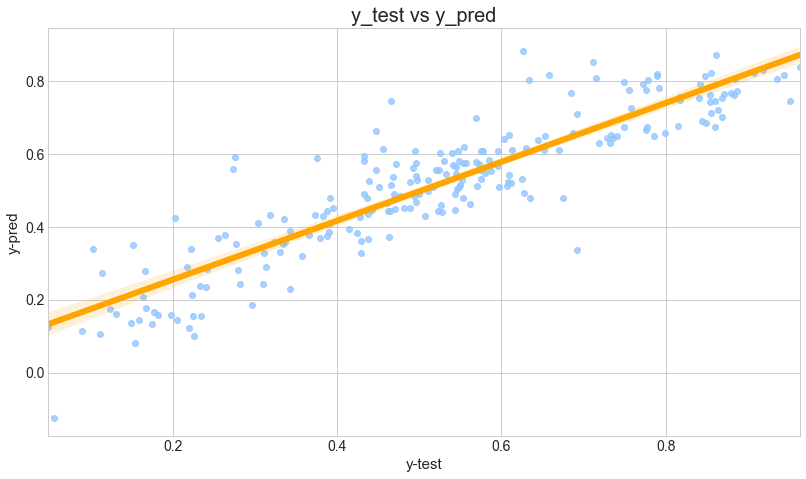

In [ ]:
#plotting y_test vs y_test_pred
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=[12,7])
sns.regplot(y_test,y_test_pred, line_kws={'color':'orange'})
plt.title("y_test vs y_pred", fontsize= 20)
plt.xlabel("y-test", fontsize=15)
plt.ylabel("y-pred", fontsize=15)
plt.show()

## Final Interpretations:

- The R-sqaured value for the train model is `0.822` and the adjusted R-squared value is `0.819`

- The R-sqaured value for the test model is `0.8096` and the adjusted R-squared value is `0.8004`

- Since there's a minute difference between the adjusted R-squared value of train and test data, we can say our final model is working perfectly

Our equaltion for the best fit line is:

$ cnt  = 0.1952 + 0.2332* yr -0.0980* holiday + 0.4695* temp -0.1122* season_spring + 0.0534* season_winter - 0.0690* mnth_Jul + 0.0654* mnth_Sep - 0.2993* weathersit_LightSnow+LightRain	- 0.0781* weathersit_Mist+FewCloudy $

- Features like yr, temp, season_winter, mnth_Sep have a positive coefficient which signifies that if these values are increased, then this will lead to an increase in the value of cnt.

- Features like holiday, season_spring, mnth_Jul, weathersit_LightSnow+LightRain, weathersit_Mist+FewCloudy have a negetive coefficient which indicates that by increasing these values, it'll lead to a decrease in the value of cnt